Inteligencia Artificial y Redes Neuronales

Actividad 3: PIA.- Entrenamiento de una red neuronal convolucional

Miembros del Equipo

Patricio Aguero Millan 1998474 IMTC

Angela Paola Oyervides Lopez 2003806 IMTC

Maximiliano Bautista Delgado 1924598 IMTC

Judith Montserrath Segura Rodríguez 2082412 IMTC

In [1]:
# Se importan todas las librerias para realizar el proyecto
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
print(tf.__version__)

2.17.1


In [2]:
# Se instala y configura API de kaggle
!pip install kaggle
from google.colab import files

In [3]:
# Se sube archivo de Token de kaggle
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"patricioageromillan","key":"4bfc8f77df82ad61fca609459d7c6d7e"}'}

In [4]:
# Se configura y descargan datos de kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d niteshfre/chessman-image-dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset
License(s): other
 85% 49.0M/57.6M [00:00<00:00, 145MB/s]
100% 57.6M/57.6M [00:00<00:00, 147MB/s]


In [5]:
# Se descomprimen datos
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/chessman-image-dataset.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [6]:
# Se coloca ruta de la carpeta principal
images_folder = "/content/Dataset/Chessman-image-dataset/Chess"

# Se colocan las etiquetas de las piezas
# Sus nombres en el orden de la carpeta son: Bishop, King, Knight, Pawn, Queen, Rook
def imagenesyetiquetas(directorio_base):
    imagenes = []
    etiquetas = []
    categorias = os.listdir(directorio_base)
    label_dict = {categoria: idx for idx, categoria in enumerate(categorias)}

    for categoria in categorias:
        ruta_carpeta = os.path.join(directorio_base, categoria)
        for archivo in os.listdir(ruta_carpeta):
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            if ruta_imagen.endswith('.jpg') or ruta_imagen.endswith('.png'):
                imagen = cv2.imread(ruta_imagen)
                if imagen is not None:
                    imagen = cv2.resize(imagen, (150, 150))  # Tamaño del redimencionamiento de imagenes
                    imagenes.append(imagen)
                    etiquetas.append(label_dict[categoria])

    imagenes = np.array(imagenes)
    etiquetas = np.array(etiquetas)
    return imagenes, etiquetas, label_dict

# Directorio base donde están las carpetas de imágenes
directorio_base = '/content/Dataset/Chessman-image-dataset/Chess'

imagenes, etiquetas, label_dict = imagenesyetiquetas(directorio_base)

# Se muestra las etiquetas de los datos
print("Diccionario de etiquetas:", label_dict)

# Se muestran sus imagenes y sus etiquetas
print("Número de imágenes cargadas:", len(imagenes))
print("Número de etiquetas cargadas:", len(etiquetas))
print("Primeras 5 etiquetas:", etiquetas[:5])

Diccionario de etiquetas: {'Bishop': 0, 'Queen': 1, 'Rook': 2, 'Pawn': 3, 'King': 4, 'Knight': 5}
Número de imágenes cargadas: 534
Número de etiquetas cargadas: 534
Primeras 5 etiquetas: [0 0 0 0 0]


In [7]:
# Se imprime el numero de clases
num_classes = len(label_dict)
print(f"Number of classes: {num_classes}")

Number of classes: 6


In [8]:
np.shape(imagenes)

(534, 150, 150, 3)

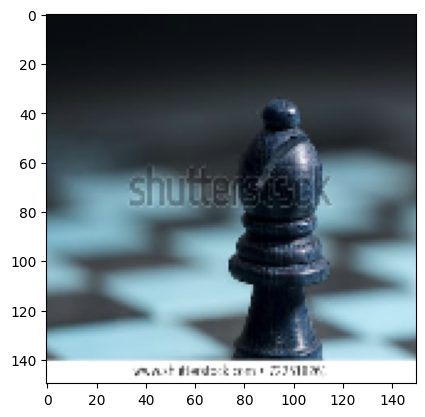

In [9]:
# Se muestra imagen 10
plt.imshow(imagenes[10])

In [10]:
train_images, test_images, train_labels, test_labels = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [11]:
# Se muestran datos de Imagenes
print("Número total de etiquetas:", len(train_labels))
print("úmero total de imágenes:", len(train_images))
print("Cantidad de imágenes y el tamaño de cada imagen:", train_images.shape)


Número total de etiquetas: 427
úmero total de imágenes: 427
Cantidad de imágenes y el tamaño de cada imagen: (427, 150, 150, 3)


In [12]:
# Normalización de valores de pixeles.
train_images = train_images / 255.0
test_images = test_images / 255.0

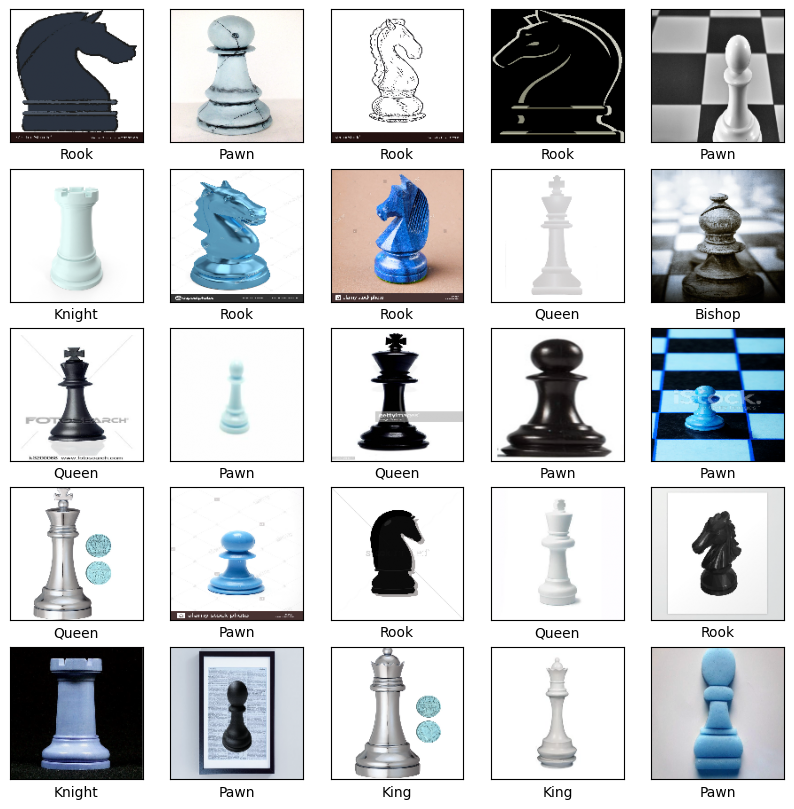

In [13]:
# Se muestran algunas piezas con sus etiquetas
class_names = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
# Se comienza con el entrenamiento de Red Neuronal Artificial Convolusional (RNAC)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Se añaden capas
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))


In [16]:
# Se observa resumen
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73984)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       4,735,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,792,140 (18.28 MB)

 Trainable params: 4,792,140 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.1575 - loss: 2.6394 - val_accuracy: 0.1495 - val_loss: 1.9096
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.2152 - loss: 1.8323 - val_accuracy: 0.1589 - val_loss: 1.9694
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3305 - loss: 1.6328 - val_accuracy: 0.2804 - val_loss: 1.9920
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4012 - loss: 1.4427 - val_accuracy: 0.2710 - val_loss: 1.8834
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5052 - loss: 1.3048 - val_accuracy: 0.3458 - val_loss: 1.7929
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6555 - loss: 0.9498 - val_accuracy: 0.2991 - val_loss: 2.0133
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6954 - loss: 0.8697 - val_accuracy: 0.2804 - val_loss: 2.5412
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7496 - loss: 0.7415 - val_accuracy: 0.3551 - val_loss: 2.4499
Epo

In [18]:
# Se imprime la exactitud
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Loss: {test_loss}')
print(f'Accuracy: {test_acc}')

4/4 - 1s - 303ms/step - accuracy: 0.3084 - loss: 3.1073
Loss: 3.107266902923584
Accuracy: 0.30841121077537537


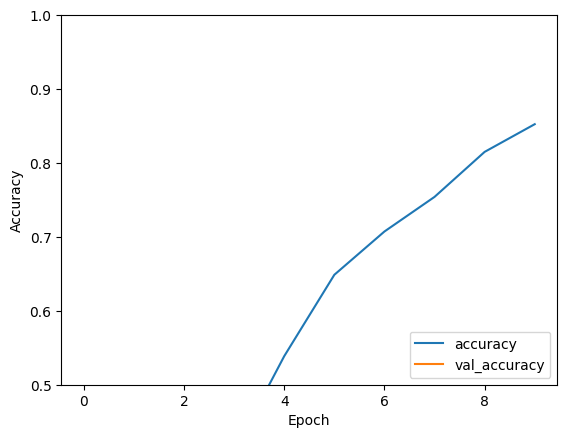

4/4 - 2s - 551ms/step - accuracy: 0.3084 - loss: 3.1073


In [19]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [20]:
# Predicciones
predictions = model.predict(test_images)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step


In [21]:
# Se realizan las 5 predicciones
x1 = test_labels[1]
y1 = np.argmax(predictions[1])
x2 = test_labels[2]
y2 = np.argmax(predictions[2])
x3 = test_labels[3]
y3 = np.argmax(predictions[3])
x4 = test_labels[4]
y4 = np.argmax(predictions[4])
x5 = test_labels[5]
y5 = np.argmax(predictions[5])
print("Predicción; ", x1, "Clase:",y1)
print("Predicción; ", x2, "Clase:",y2)
print("Predicción; ", x3, "Clase:",y3)
print("Predicción; ", x4, "Clase:",y4)
print("Predicción; ", x5, "Clase:",y5)

Predicción;  1 Clase: 0
Predicción;  1 Clase: 2
Predicción;  2 Clase: 2
Predicción;  1 Clase: 1
Predicción;  4 Clase: 1


In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), predictions_array[:6], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

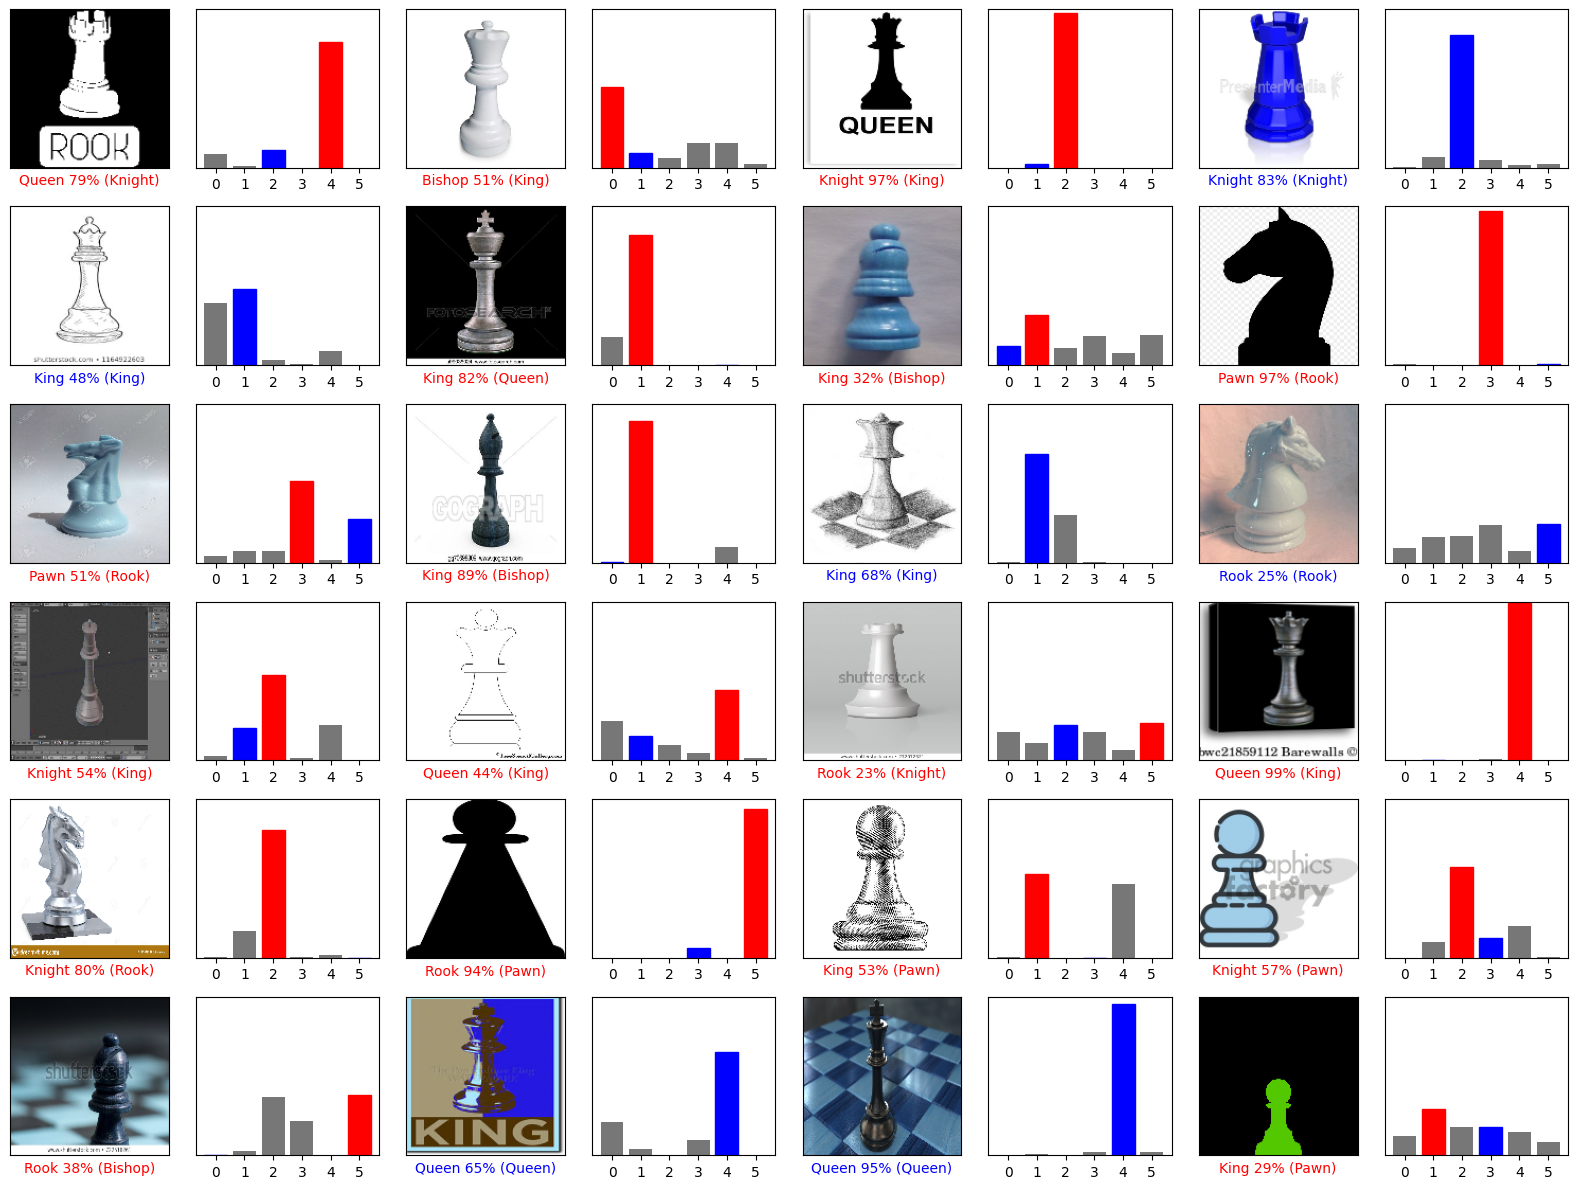

In [23]:
# Se grafican multiples imagenes con su grafica
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()